Team name: `SGS_Tut01_NhatQuang_Team04`

Members:
* Vo Huy Chu (s4075654)
* 
* 
* 
* 
* 
* 

# Dataset Acquisition
The dataset was obtained from Kaggle at the web address https://www.kaggle.com/datasets/budincsevity/szeged-weather. It contains the features of the weather in Szeged of Hungary from 2006 to 2016, measurements are recorded every hour.

    Our task is to forecast the value of the apparent temperature.

In [160]:
# Import `pandas`:
import pandas as pd
# Read the dataset:
dataset = pd.read_csv("./weatherHistory.csv")


# Peform EDA (exploratory data analysis)

In [161]:
# List of non-null values and data type for each feature:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


From the result above, we can see that the dataset contains 96453 samples, without any of them being empty, all features have the same number of samples being $96453$. Overall, the quality of the chosen dataset is high, containing no missing values or unbalanced classes.


8 of the 12 features are numeric, including the 2 types of temperature, the humidity, the wind speed, the wind bearing, visibility, cloud cover and pressure.

In [162]:
# A summary of the statistics for the numerical features:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


The values contained in the `Loud Cover` feature, as seen in the above table, are $0.0$ for all 96453 samples. As such, we can safely remove this feature from the dataset.

In [163]:
# A few samples from the beginning of the dataset:
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


The 4 features (`Formatted Date`, `Summary`, `Precip Type` and `Daily Summary`) do not contain values in the form of numerical data. We shall see if any may qualify as categorical features by getting the number of different values for each feature in the dataset, a lower value means the value may be made categorical via certain techniques such as "Label Encoding" or "One-hot encoding".

In [164]:
print(f"{dataset["Formatted Date"].value_counts()}\n")
print(f"{dataset["Summary"].value_counts()}\n")
print(f"{dataset["Precip Type"].value_counts()}\n")
print(f"{dataset["Daily Summary"].value_counts()}\n")

Formatted Date
2010-08-02 00:00:00.000 +0200    2
2010-08-02 12:00:00.000 +0200    2
2010-08-02 03:00:00.000 +0200    2
2010-08-02 04:00:00.000 +0200    2
2010-08-02 05:00:00.000 +0200    2
                                ..
2009-03-09 22:00:00.000 +0100    1
2009-03-09 21:00:00.000 +0100    1
2009-03-09 20:00:00.000 +0100    1
2009-03-09 19:00:00.000 +0100    1
2016-09-09 23:00:00.000 +0200    1
Name: count, Length: 96429, dtype: int64

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and 

From the results above, we can select `Precip Type` as the feature that can be made categorical as it only contains 2 unique values being `rain` and `snow`.

## Looking for outliers
We look for outliers by viewing the scatter plots with every pair of features:

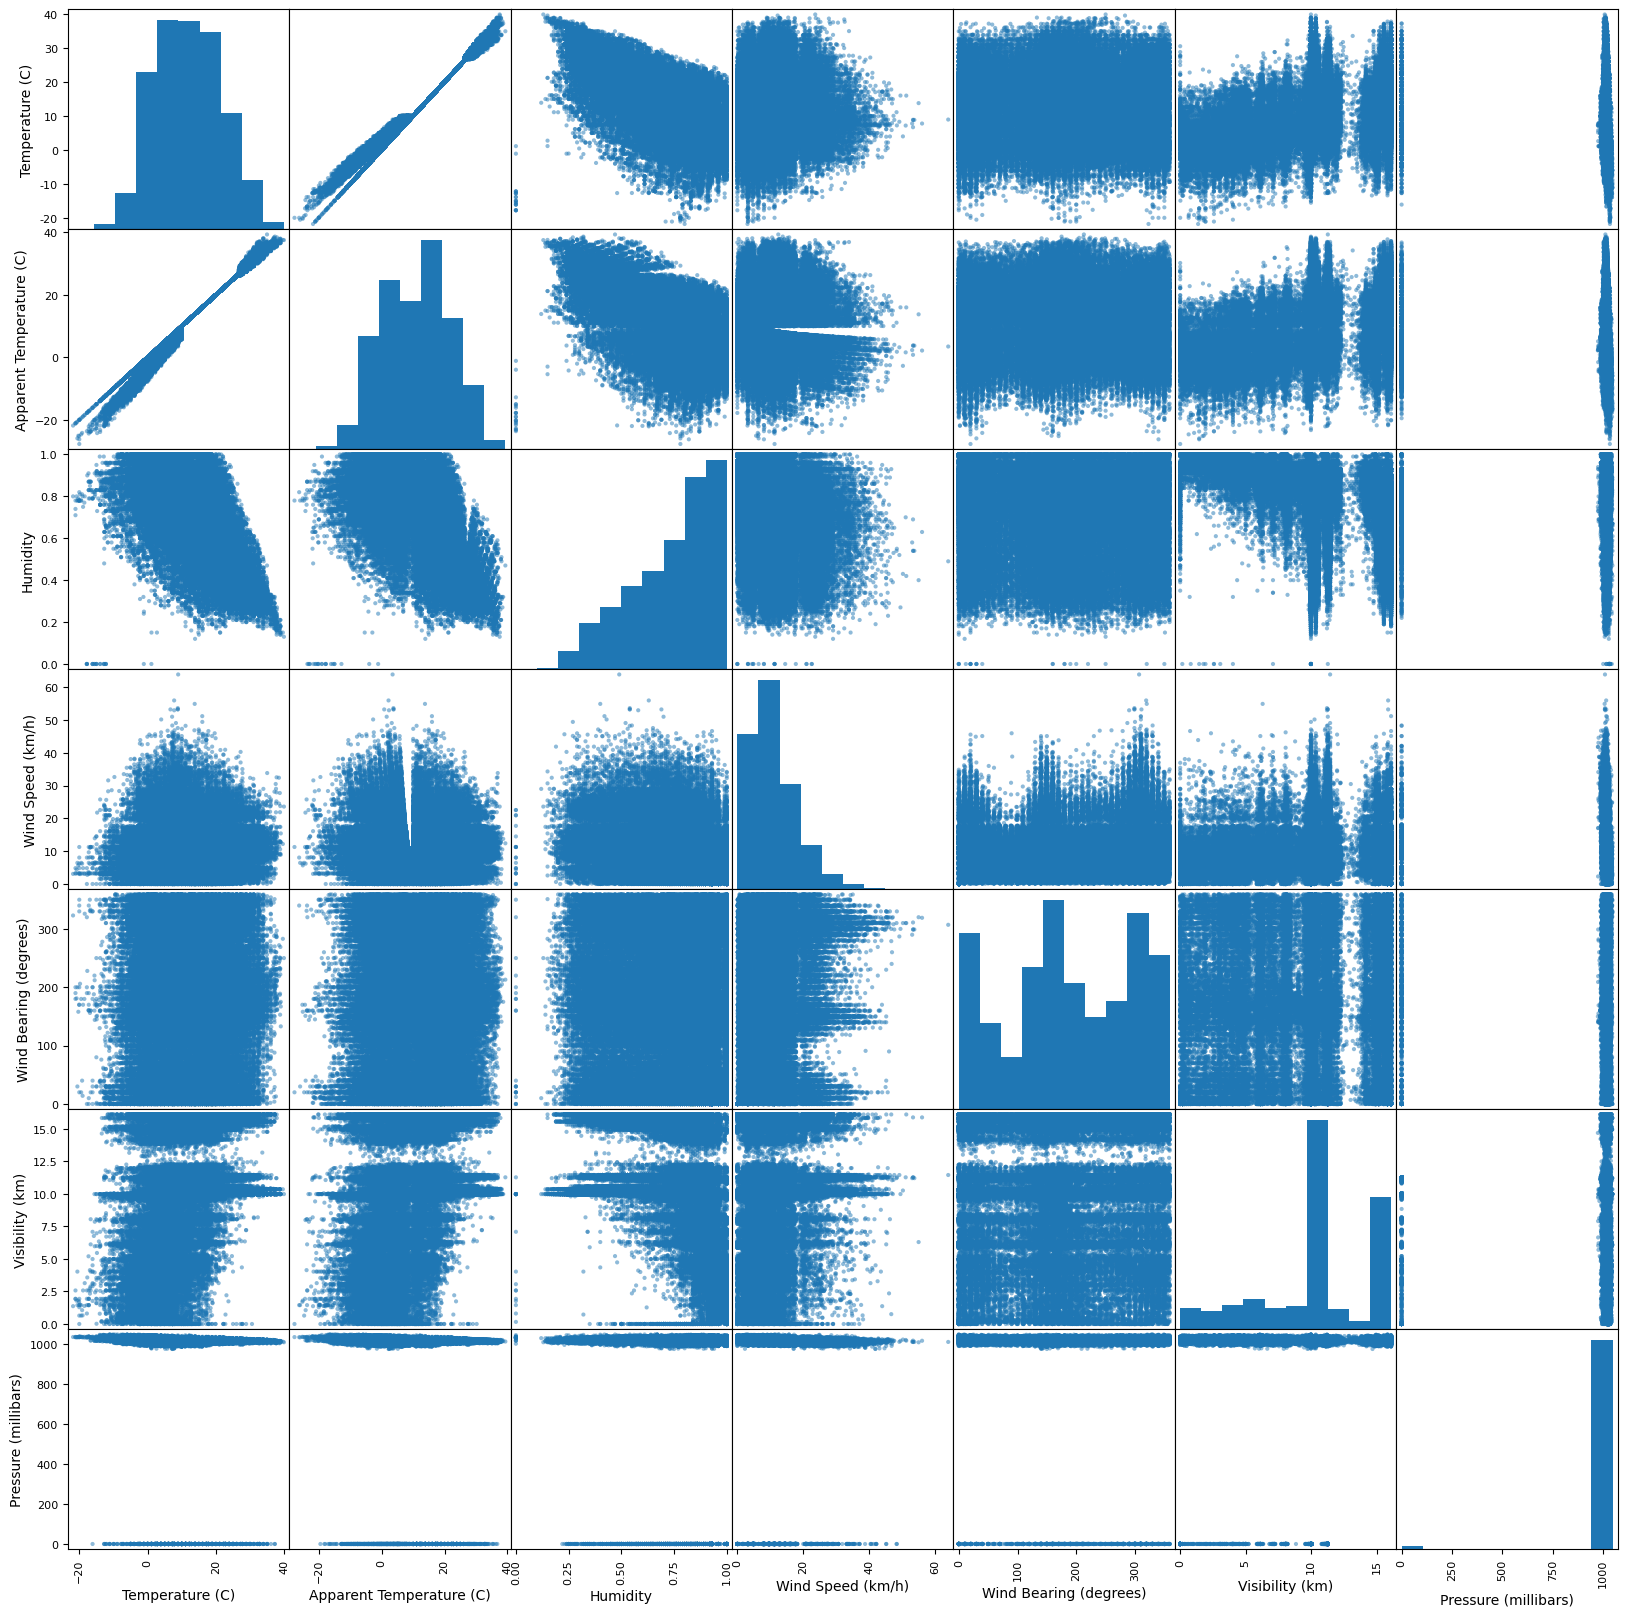

In [165]:
# Import the `scatter_matrix` class from the `plotting` module of `pandas`:
from pandas.plotting import scatter_matrix
# Import the `pyplot` module from `matplotlib`
import matplotlib.pyplot as pplt
# List of features to plot:
features_to_plot = ["Temperature (C)", "Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"]
# Perform the `scatter_matrix` action on the dataset with the features in the list of `features_to_plot` above:
scatter_matrix(dataset[features_to_plot], figsize=(20, 20))
# Show the scatter matrix and the histograms on the topleft-bottomright diagonal:
pplt.show()

* The various points far from the blue clusters seen in the graphs above are outliers.
* Additionally, in the histograms on display, the bars separated from the main clusters are outliers.

# Preprocess data
### Removing unecessary features
There are certain features that do not aid in uncovering the apparent temperature as required by the task, those being `Formatted Date`, `Summary` and `Daily Summary`. Therefore, we shall remove them from the dataset, along with the feature `Loud Cover` from earlier.

In [166]:
# Remove the columns using drop():
dataset.drop(columns=["Formatted Date", "Summary", "Daily Summary", "Loud Cover"])

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


### Removing outlier rows
There are two methods to removing outliers, those being the Z_Score and the IQR.
* Z_Score: Measures how many standard deviations a data point is from the mean of the dataset.

    Formula: $Z = \frac{(X − μ)}{σ}$
​

    in which:

    𝑋 is the value of the data point,

    𝜇 is the mean of the dataset,

    𝜎 is the standard deviation of the dataset.

* IQR (Interquartile Range): Measures the spread of the middle 50% of a dataset.

    Formula: $IQR = Q_3 - Q_1$


    in which:

    $Q_1$ (First Quartile): The 25<sup>th</sup> percentile, or the value below which 25% of the data falls.

    $Q_3$ (Third Quartile): The 75<sup>th</sup> percentile, or the value below which 75% of the data falls.

    Lower Bound = $Q_1 − 1.5 × IQR$

    Upper Bound = $𝑄_3 + 1.5 × IQR$
    
    Any data point below the lower bound or above the upper bound is considered an outlier.

Due to the IQR being less affected by extreme values compared to the range, we shall utilise it to detect outliers.

In [167]:
# Import numpy for use in feature selection:
import numpy as np
# Select only numeric features of the dataset for calculating outliers:
numeric_dataset = dataset.select_dtypes(include=[np.number])
# Calculate Q1:
Q1 = numeric_dataset.quantile(0.25)
# Calculate Q3:
Q3 = numeric_dataset.quantile(0.75)
# Calculate IQR:
IQR = Q3 - Q1

# Define lower bound:
lower_bound = Q1 - 1.5 * IQR
# Define upper bound:
upper_bound = Q3 + 1.5 * IQR

# Create a Boolean dataset in which the value is set to `True` for each cell below the lower bound:
is_below_lower_bound = numeric_dataset < lower_bound
# Identify rows with values above the upper bound:
is_above_upper_bound = numeric_dataset > upper_bound
# Combine both conditions to identify outliers:
is_outlier = is_below_lower_bound | is_above_upper_bound
# Determine which rows have any outliers across all columns:
rows_with_outliers = is_outlier.any(axis=1)
"""
any(axis=1): If at least one column in the row has True, the result for that row is True. If all columns in the row are False, the result is False.
"""
# Negate the condition to select rows without outliers:
rows_without_outliers = ~rows_with_outliers
# Filter the dataset to keep only rows without outliers
filtered_dataset = dataset[rows_without_outliers]

### Splitting training and testing data
There are two methods to accomplish this, being "randomised sample selection" and "stategic sample selection". The prior will randomly select 20% of data for the test set, useful in scenarios where the dataset is large. The second is used when we want to maintain the distributions of important features. As our dataset is large (96453 samples), "randomised sample selection" is appropriate for our task.

In [168]:
# Import the `train_test_split` class from the `model_selection` module from Scikit-Learn:
from sklearn.model_selection import train_test_split
# Split the dataset:
training_set, test_set = train_test_split(filtered_dataset, test_size=0.2, random_state=69)
"""
`test_size=0.2`: 20% of the dataset will be distributed to the test set
`random_state`: Used to get the same training set
"""

'\n`test_size=0.2`: 20% of the dataset will be distributed to the test set\n`random_state`: Used to get the same training set\n'

### Removing the labels
Our model is not supposed to take values of the labels into calculation; therefore, we must remove them from the dataset.

In [169]:
training_set = training_set.drop(columns = "Apparent Temperature (C)") 
test_set = test_set.drop(columns = "Apparent Temperature (C)")

### The class `ColumnSelector`
Child of `BaseEstimator` and `TransformerMixin`.

    + `BaseEstimator`: provides methods for parameter management
    + `TransformerMixin`: provides a default implementation of the `fit_transform()` method

In [170]:
# Import `BaseEstimator` and `TransformerMixin` for use:
from sklearn.base import BaseEstimator, TransformerMixin
# Defining `ColumnSelector``: a transformer for choosing columns:
class ColumnSelector(BaseEstimator, TransformerMixin):
    # Defining constructor for `ColumnSelector`:
    def __init__(self, feature_names):
        # Assign to the attribute `feature_names` the value of `feature_names`
        self.feature_names = feature_names
    # The `fit()` method to fit the transformer to the data
    def fit(self, dataframe, labels=None):
        # In this case, it only returns the instance itself as no modifications are needed:
        return self
    # The `transform()` method to apply the transformation
    def transform(self, dataframe):
        # In this case, it selects the columns from the dataset with the names as chosen in `feature_names`
        return dataframe[self.feature_names].values

We split the features into two categories: Numerical and Categorical.

In [171]:
# The numerical features are automatically selected from the training set, based on their data type:
numerical_features = list(training_set.select_dtypes(include=[np.number]))
# Only one categorical feature is available, as selected above:
categorical_features = ["Precip Type"]

## A pipeline to preprocess numeric data
With the standard scaler, we utilise the settings `with_mean=True` and `with_std=True` because:
* `with_mean=True`: Center the data by subtracting the mean of each feature.
* `with_std=True`: Scales the data to have unit variance by dividing by the standard deviation of each feature.
These two together allow for mean to be $0$ and the standard deviation to be $1$

In [172]:
# Import the `Pipeline` class from the `pipeline` module from Scikit-Learn:
from sklearn.pipeline import Pipeline
# Import the `StandardScaler` class from the `preprocessing` module from Scikit-Learn:
from sklearn.preprocessing import StandardScaler
numerical_pipeline = Pipeline([
    ('selector', ColumnSelector(numerical_features)), # Make the selection of numerical features
    ('standard_scaler', StandardScaler(with_mean=True, with_std=True, copy=True)) # Scale features to zero mean and unit variance
    ])

## A pipeline to preprocess categorical data
The method we shall utilize to accomplish this is "One-Hot Encoding", which portrays a value as a vector, rather than "Label Encoding", which interprets a value as a single integer value. The reason for this choice is due to our data having no inherent order (`rain` has no correlation with `snow` in the context of this dataset), were we to utilize the other encoding variant, the machine-learning model may misinterpret the relationship between features or samples.

In [173]:
# Import the `OneHotEncoder` class from the `preprocessing` module from Scikit-Learn:
from sklearn.preprocessing import OneHotEncoder
categorical_pipeline = Pipeline([
    ('selector', ColumnSelector(categorical_features)), # Make the selection of categorical features
    ('categorical_encoder', OneHotEncoder()) # Vectorise the categorical data
    ])

## A full pipeline to preprocess the entire dataset
The `FeatureUnion` class combines the pipelines into a single transformation process in which the different types of features are processed differently.
In this case, the `numerical_pipeline` is applied to the numerical features of the dataset while the `categorical_pipeline` is applied to the categorical one(s).

In [174]:
# Import the `FeatureUnion` class from the `pipeline` module from Scikit-Learn:
from sklearn.pipeline import FeatureUnion
pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),
    ("categorical_pipeline", categorical_pipeline) ])  

## Transform the data using the created pipeline

In [175]:
# Transform the `training_set` using `fit()` and `transform()` together as `fit_transform()`
transformed_training_set = pipeline.fit_transform(training_set)

## Inspect the processed data
We view a few samples from the beginning of the processed data.

In [176]:
# We now have a `csr_matrix` object, to view its content, we have to convert some of it to an array:
print(transformed_training_set[[0, 1, 2, 3, 4], :].toarray())
# Print out the number of rows and columns in the output data:
print(f"(Rows, Columns): {transformed_training_set.shape}")

[[-0.73385481  0.74334078  0.52859303 -0.46157823 -1.3945359   0.
   0.37774002  1.          0.          0.        ]
 [ 0.37710136  0.69229355  2.53993625  1.34028464  0.17910521  0.
  -1.02350702  1.          0.          0.        ]
 [ 0.56734966 -0.6349344   0.34373707 -1.4885467  -0.11474424  0.
   0.2210605   1.          0.          0.        ]
 [ 1.86914132 -1.14540668  0.40719508 -1.46053847  1.35450299  0.
   0.73544232  1.          0.          0.        ]
 [-1.07677151  0.23286849 -0.89231474  0.7054314   0.17910521  0.
   0.19445454  1.          0.          0.        ]]
(Rows, Columns): (71412, 10)
